# Lidar Test

11 May 2019

ydlidar data collected using gecko. `the_collector` was setup to capture data
using `pickle` so the data is easily readable.

**Note:** this is messed up a little. The lidar is tethered by USB cables and power 
to my desktop, so I cannot really move it nicely and I am constantly in the
way ... but it sort of works given these *terrible* conditions.

In [1]:
%matplotlib inline 

import cv2
import numpy as np
from matplotlib import pyplot as plt 

In [59]:
import pickle

# gecko robotics library
from pygecko.messages import lidar_st

# simple slam library based on breezy slam
from sslam import RMHC_SLAM
from sslam.sensors_models import Laser_Model

In [69]:
%ls ../../gecko

bagit.py*       lidar.2019-05-11-20:08:58.014623.pickle.bag  sub.cpp
build/          lidar.2019-05-11-21:11:33.853614.pickle.bag
CMakeLists.txt  pub.cpp


In [71]:
# fname = "../../gecko/lidar.2019-05-11-20:08:58.014623.pickle.bag"
fname = "../../gecko/lidar.2019-05-11-21:11:33.853614.pickle.bag"
with open(fname, 'rb') as fd:
    data = pickle.load(fd)

In [96]:
class YDLIDAR_Model(Laser_Model):
    '''
    A class for
    scan_size, scan_rate_hz, detection_angle_degrees, distance_no_detection_mm, detection_margin=0, offset_mm=0
    '''
    def __init__(self, detectionMargin = 0, offsetMillimeters = 0):
        Laser_Model.__init__(self, SCAN_SIZE, 5, 360-8, 120, detectionMargin, offsetMillimeters)

In [104]:
SCAN_SIZE = 620
MAP_SIZE_METERS = 8
MAP_SIZE_PIXELS = 500

In [105]:
slam = RMHC_SLAM(YDLIDAR_Model(), MAP_SIZE_PIXELS, MAP_SIZE_METERS)

In [106]:
mapbytes = bytearray(MAP_SIZE_PIXELS * MAP_SIZE_PIXELS)

In [107]:
save = []
for p in data['lidar']:
    try:
        pts = [1000*x[1] for x in p.data[:SCAN_SIZE]]
        slam.update(pts)
        save.append(slam.getpos())
    except:
        print(len(pts))
            

619


In [108]:
slam.getmap(mapbytes)

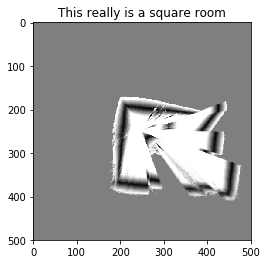

In [111]:
mapimg = np.reshape(np.frombuffer(mapbytes, dtype=np.uint8), (MAP_SIZE_PIXELS, MAP_SIZE_PIXELS))

plt.imshow(mapimg, cmap='gray')
plt.title('This really is a square room');

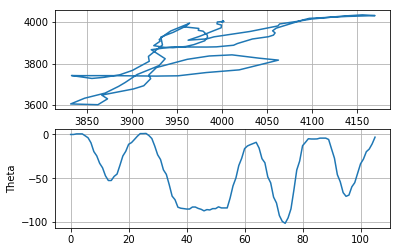

In [112]:
plt.subplot(2,1,1)
plt.plot([x[0] for x in save], [x[1] for x in save])
plt.grid(True)

# the angle looks the best, I just basically turned from
# side to side trying to get different data
plt.subplot(2,1,2)
plt.plot([x[2] for x in save])
plt.grid(True)
plt.ylabel('Theta');